## ASSIGNED exam3-5 BVP by ODE



CLOSED: <span class="timestamp-wrapper"><span class="timestamp">[2018-12-10 Mon 11:52]</span></span>

:LABEL:    exam3-5
:POINTS:   3
:TYPE:     exam-3
:RUBRIC:   default
:RUBRIC\_CATEGORIES: technical, presentation
:RUBRIC\_WEIGHTS: 0.8, 0.2
:DUEDATE:  2018-12-10 16:00:00
:GRADER:   John Kitchin

**This is an exam. You must be present in the exam room to get credit for this problem unless you have prior permission from the instructor. You may not talk during the exam except to ask an instructor a question. By turning this in, you agree that this work is your own, and you did not get unauthorized help to complete it or provide unauthorized help to anyone else. You may not modify your exam answer after the due time without permission.**

In this problem we learn a new way to solve a *linear* boundary value problem. The problem of interest is:

$y'''(x) - x^2 y = -x^4$ with $y(0)=0, y'(0)=0, y(2)=4$.

This will take some steps, so read the following carefully. Some of these steps will be worked out, and others you will be asked to complete. You *do not need to derive these*, they are here to guide what you will do.

First, we recall that the general solution of a linear ODE can be written as a linear combination of solutions to the homogeneous equation (where the right hand side is zero) and a particular solution to the non-homogeneous equation (where the right hand side in this case is $-x^4$).

Here are the homogeneous versions and the particular version of the equation above, expressed in *initial value form*. The initial conditions are chosen here to provide three linearly independent functions $Y_1, Y_2$, and $Y_3$. For $Y_p$ any values can be used since any particular solution will do.

$Y_1''' - x^2 Y_1 = 0$ with $Y_1(0)=1, Y_1'(0)=0, Y_1''(0)=0$

$Y_2''' - x^2 Y_2 = 0$ with $Y_2(0)=0, Y_2'(0)=1, Y_2''(0)=0$

$Y_3''' - x^2 Y_3 = 0$ with $Y_3(0)=0, Y_3'(0)=0, Y_3''(0)=1$

$Y_p''' - x^2 Y_p = -x^4$ with $Y_p(0)=0, Y_p'(0)=0, Y_p''(0)=0$

These can be combined to form the general solution to the differential equation.

$y(x) = C_1 Y_1(x) + C_2 Y_2(x) + C_3 Y_3(x) + Y_p(x)$

To get towards a solution to the original BVP, we next apply the boundary conditions to find the constants $C_i$.

$y(0) = 0 = C_1 + 0 + 0 + 0$

$y'(0) = 0 = 0 + C_2 + 0 + 0$

$y(2) = 4 = C_1 Y_1(2) + C_2 Y_2(2) + C_3 Y_3(2) + Y_p(2)$

Combined, these lead to:

$y(x) = \frac{4 - Y_p(2)}{Y_3(2)} Y_3(x) + Y_p(x)$ where $Y_p(2)$ means the function $Y_p$ evaluated at $x=2$ and $Y_3(2)$ means the function $Y_3$ evaluated at $x=2$.

That is remarkably the solution to the boundary value problem originally stated, and we can now get $Y_3$ and $Y_p$ by integrating two *ordinary initial value* differential equations!



### Solve for $Y_3$ and $Y_p$



Find solutions to these two initial value ODEs over the range of $x=0$ to $x=2$:

$Y_3''' - x^2 Y_3 = 0$ with $Y_3(0)=0, Y_3'(0)=0, Y_3''(0)=1$

Note that in the next step you will need to evaluate $Y_3(2)$ and $Y_p(2)$.



$Y_p''' - x^2 Y_p = -x^4$ with $Y_p(0)=0, Y_p'(0)=0, Y_p''(0)=0$



### Combine them to get a solution to the BVP



Use your solutions to create the overall solution. $Y_p(2)$ means evaluate $Y_p(x)$ at $x=2$. $Y_3(2)$ means evaluate $Y_3(x)$ at $x=2$. You can do this anyway you want.

$y(x) = \frac{4 - Y_p(2)}{Y_3(2)} Y_3(x) + Y_p(x)$

Make a plot of $y(x)$.



### solution



First, we solve for Y3 and Yp. These get converted to a system of FODEs and then are integrated normally. You have two options for later, one is make sure the solutions are the same size in vector form so they can be added together, and the other is to use dense\_output or make interpolating functions so they can be used to generate the vectors later..



# Out[23]:
# text/plain



# image/png

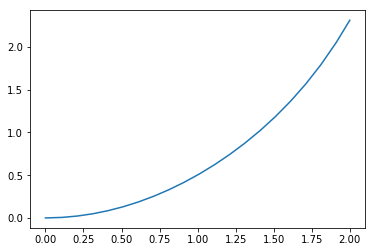

In [1]:
import numpy as np

xspan = np.linspace(0, 2, 500)

def y3prime(x, Y):
    y3, u3, v3 = Y
    y3prime = u3
    u3prime = v3
    v3prime = x**2 * y3
    return y3prime, u3prime, v3prime

from scipy.integrate import solve_ivp
y3 = solve_ivp(y3prime, (0, 2), [0, 0, 1], max_step=0.1, dense_output=True)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(y3.t, y3.y[0])

# Out[24]:
# text/plain



# image/png

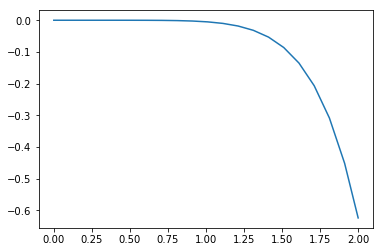

In [1]:
def ypprime(x, Y):
    yp, up, vp = Y
    ypprime = up
    upprime = vp
    vpprime = x**2 * yp - x**4
    return [ypprime, upprime, vpprime]

yp = solve_ivp(ypprime, (0, 2), [0, 0, 0], max_step=0.1, dense_output=True)
plt.plot(yp.t, yp.y[0])

I used the dense\_output approach. evaluate the solutions on the xspan.



In [1]:
Y3 = y3.sol(xspan)[0]
Yp = yp.sol(xspan)[0]

# Out[26]:

and combine them.



# Out[28]:




# image/png

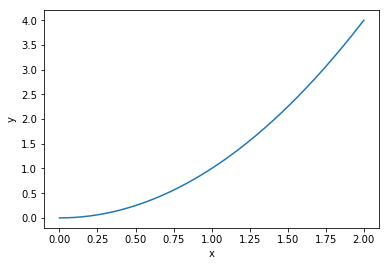

In [1]:
Y = (4 - yp.sol(2)[0]) / y3.sol(2)[0] * Y3 + Yp

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(xspan, Y)
plt.xlabel('x')
plt.ylabel('y')

Visually it appears the BCS are satisfied (0 at x=0, flat at x=0, and 4 at x=2).

